In [39]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Revise
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/rmg_K.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/rmg_3pV.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Lattice_setup/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/patch_methods.jl")

ell_k (generic function with 1 method)

In [2]:
pd = 50

50

<font size="12">$$\nu \text{ vs } \int_{D_\kappa} \Omega_{\text{RMG}}(q)$$</font>

In [22]:
NL = 5
mbz_kappa = 1

1

In [40]:
function rmg_bc_spacing(Nl_list, nu, m_kappa, pd)
    temp_list = range(0, 2, 10^2)
    spacing_list = 10 .^(temp_list)
    curvature_1 = Array{Float64}(undef, length(spacing_list))
    P = Figure(size=(2700, 2300), fontsize=30)
    for j in 1:length(Nl_list)
        Nl = Nl_list[j]
        for i in 1:length(spacing_list)
            spacing = (m_kappa) / spacing_list[i]
            # grid = make_hex([10^(-16), 10^(-16)], m_kappa, m_kappa / pd)
            grid = make_circle(m_kappa, spacing)
            # where does this 1/2 come from????
            curvature_1[i] = area(spacing / sqrt(2), 4) * sum(rmg_spinor_bc(grid, spacing, Nl, nu))
        end
        ax1 = Axis(P[j, 1], title = "N_L = "*string(Nl), xlabel = L"\frac{1}{spacing}", ylabel = L"\Omega", xscale = log10)
        lines!(ax1, spacing_list, curvature_1)
    end
    axs1 = Axis(P[:, 1], title = L"\text{RMG Spinor } \Omega (\textbf{k})", titlegap = 60)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)
    P
end

rmg_bc_spacing (generic function with 1 method)

In [41]:
nu = 1

1

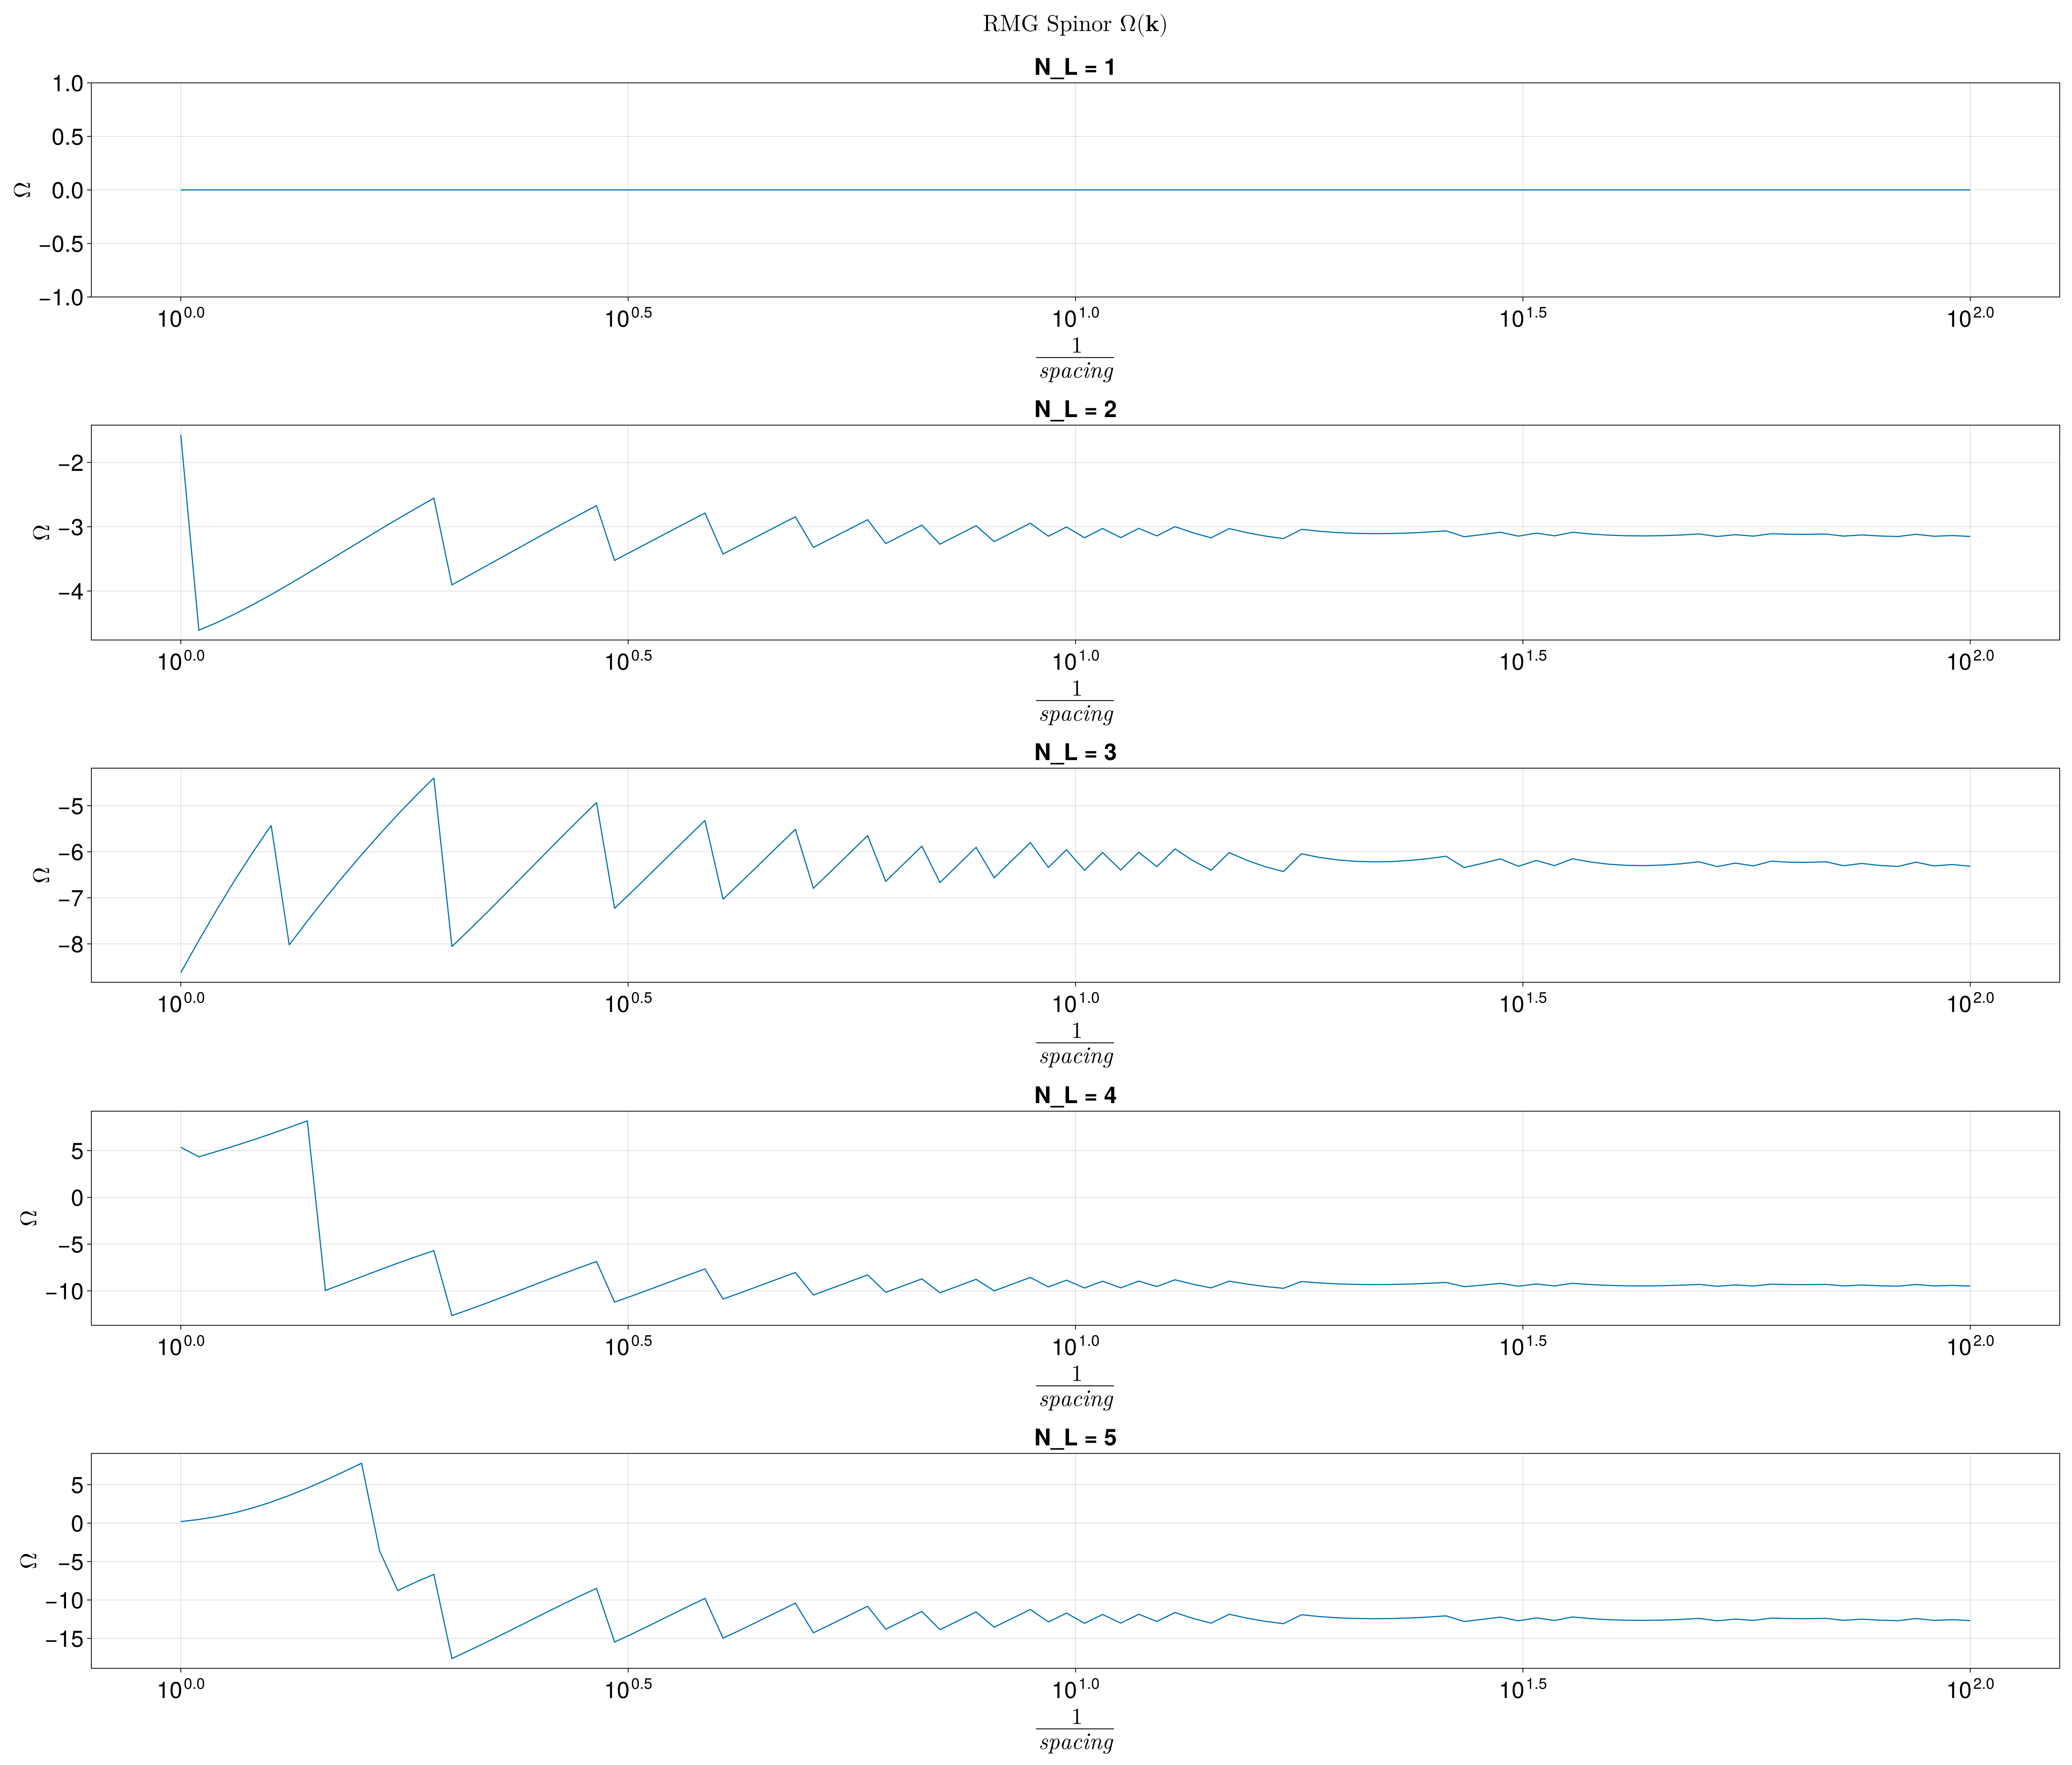

In [42]:
rmg_bc_spacing(collect(1:NL), nu, mbz_kappa, pd)

In [43]:
function rmg_int_bc_nu(m_kappa, Nl_lim, pd)
    nu_pts = 10^2
    nu_list = range(0, 2, nu_pts)
    Nl_list = collect(1:Nl_lim)
    curvatures = Array{Float64}(undef, Nl_lim, nu_pts)
    spacing = 10^(-2) * m_kappa
    # grid = make_hex([10^(-16), 10^(-16)], m_kappa, m_kappa / pd)
    grid = make_circle(m_kappa, spacing)
    P = Figure(size=(2700, 2300), fontsize=30)
    for j in 1:Nl_lim
        Nl = Nl_list[j]
        for i in 1:nu_pts
            nu = nu_list[i]
            curvatures[j, i] = area(spacing / sqrt(2), 4) * sum(rmg_spinor_bc(grid, spacing, Nl, nu))
        end
        ax1 = Axis(P[j, 1], title = "N_L = " * string(Nl), xlabel = L"\nu", ylabel = L"\int_{D_\kappa} \Omega")
        lines!(ax1, nu_list, curvatures[j, :])
    end
    axs1 = Axis(P[:, 1], title = L"\int_{D_\kappa} \Omega_{\text{RMG}}", titlegap = 60)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)
    P
end

rmg_int_bc_nu (generic function with 1 method)

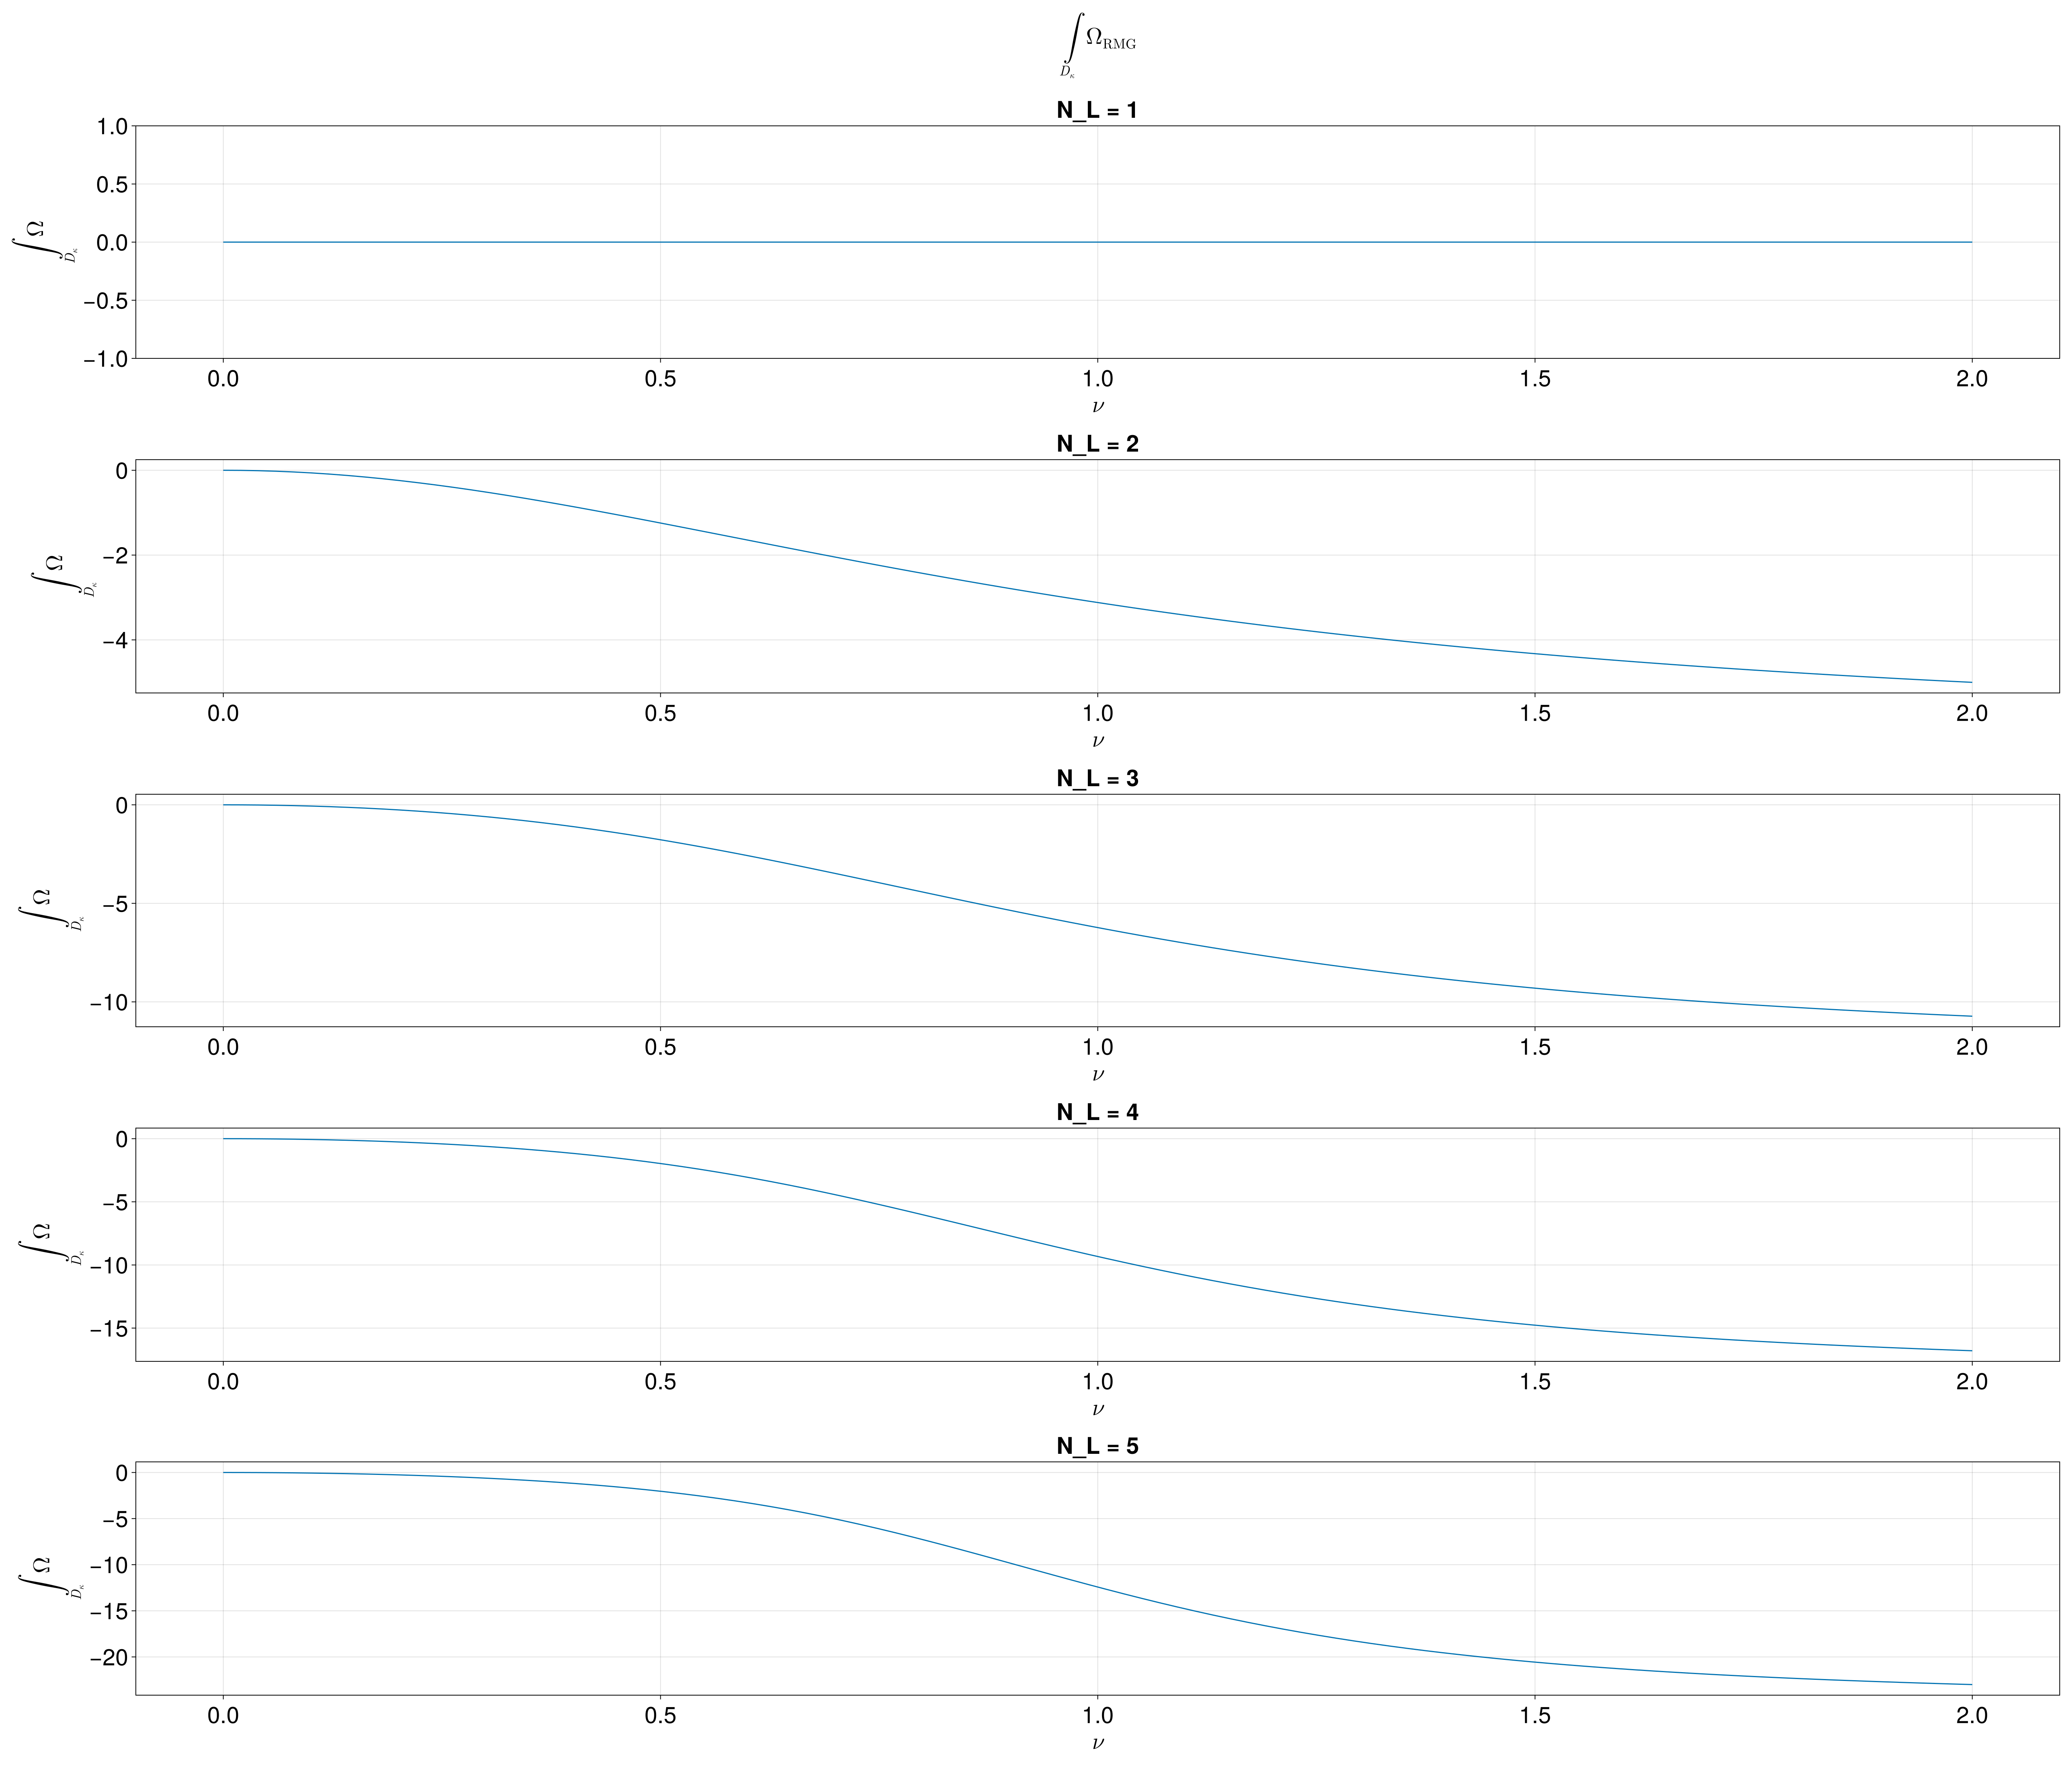

In [44]:
rmg_int_bc_nu(mbz_kappa, NL, pd)

<font size="12">$$\kappa \text{ vs } \int_{D_\kappa} \Omega_{\text{RMG}}(q)$$</font>

In [45]:
NL = 5
nu = 1

1

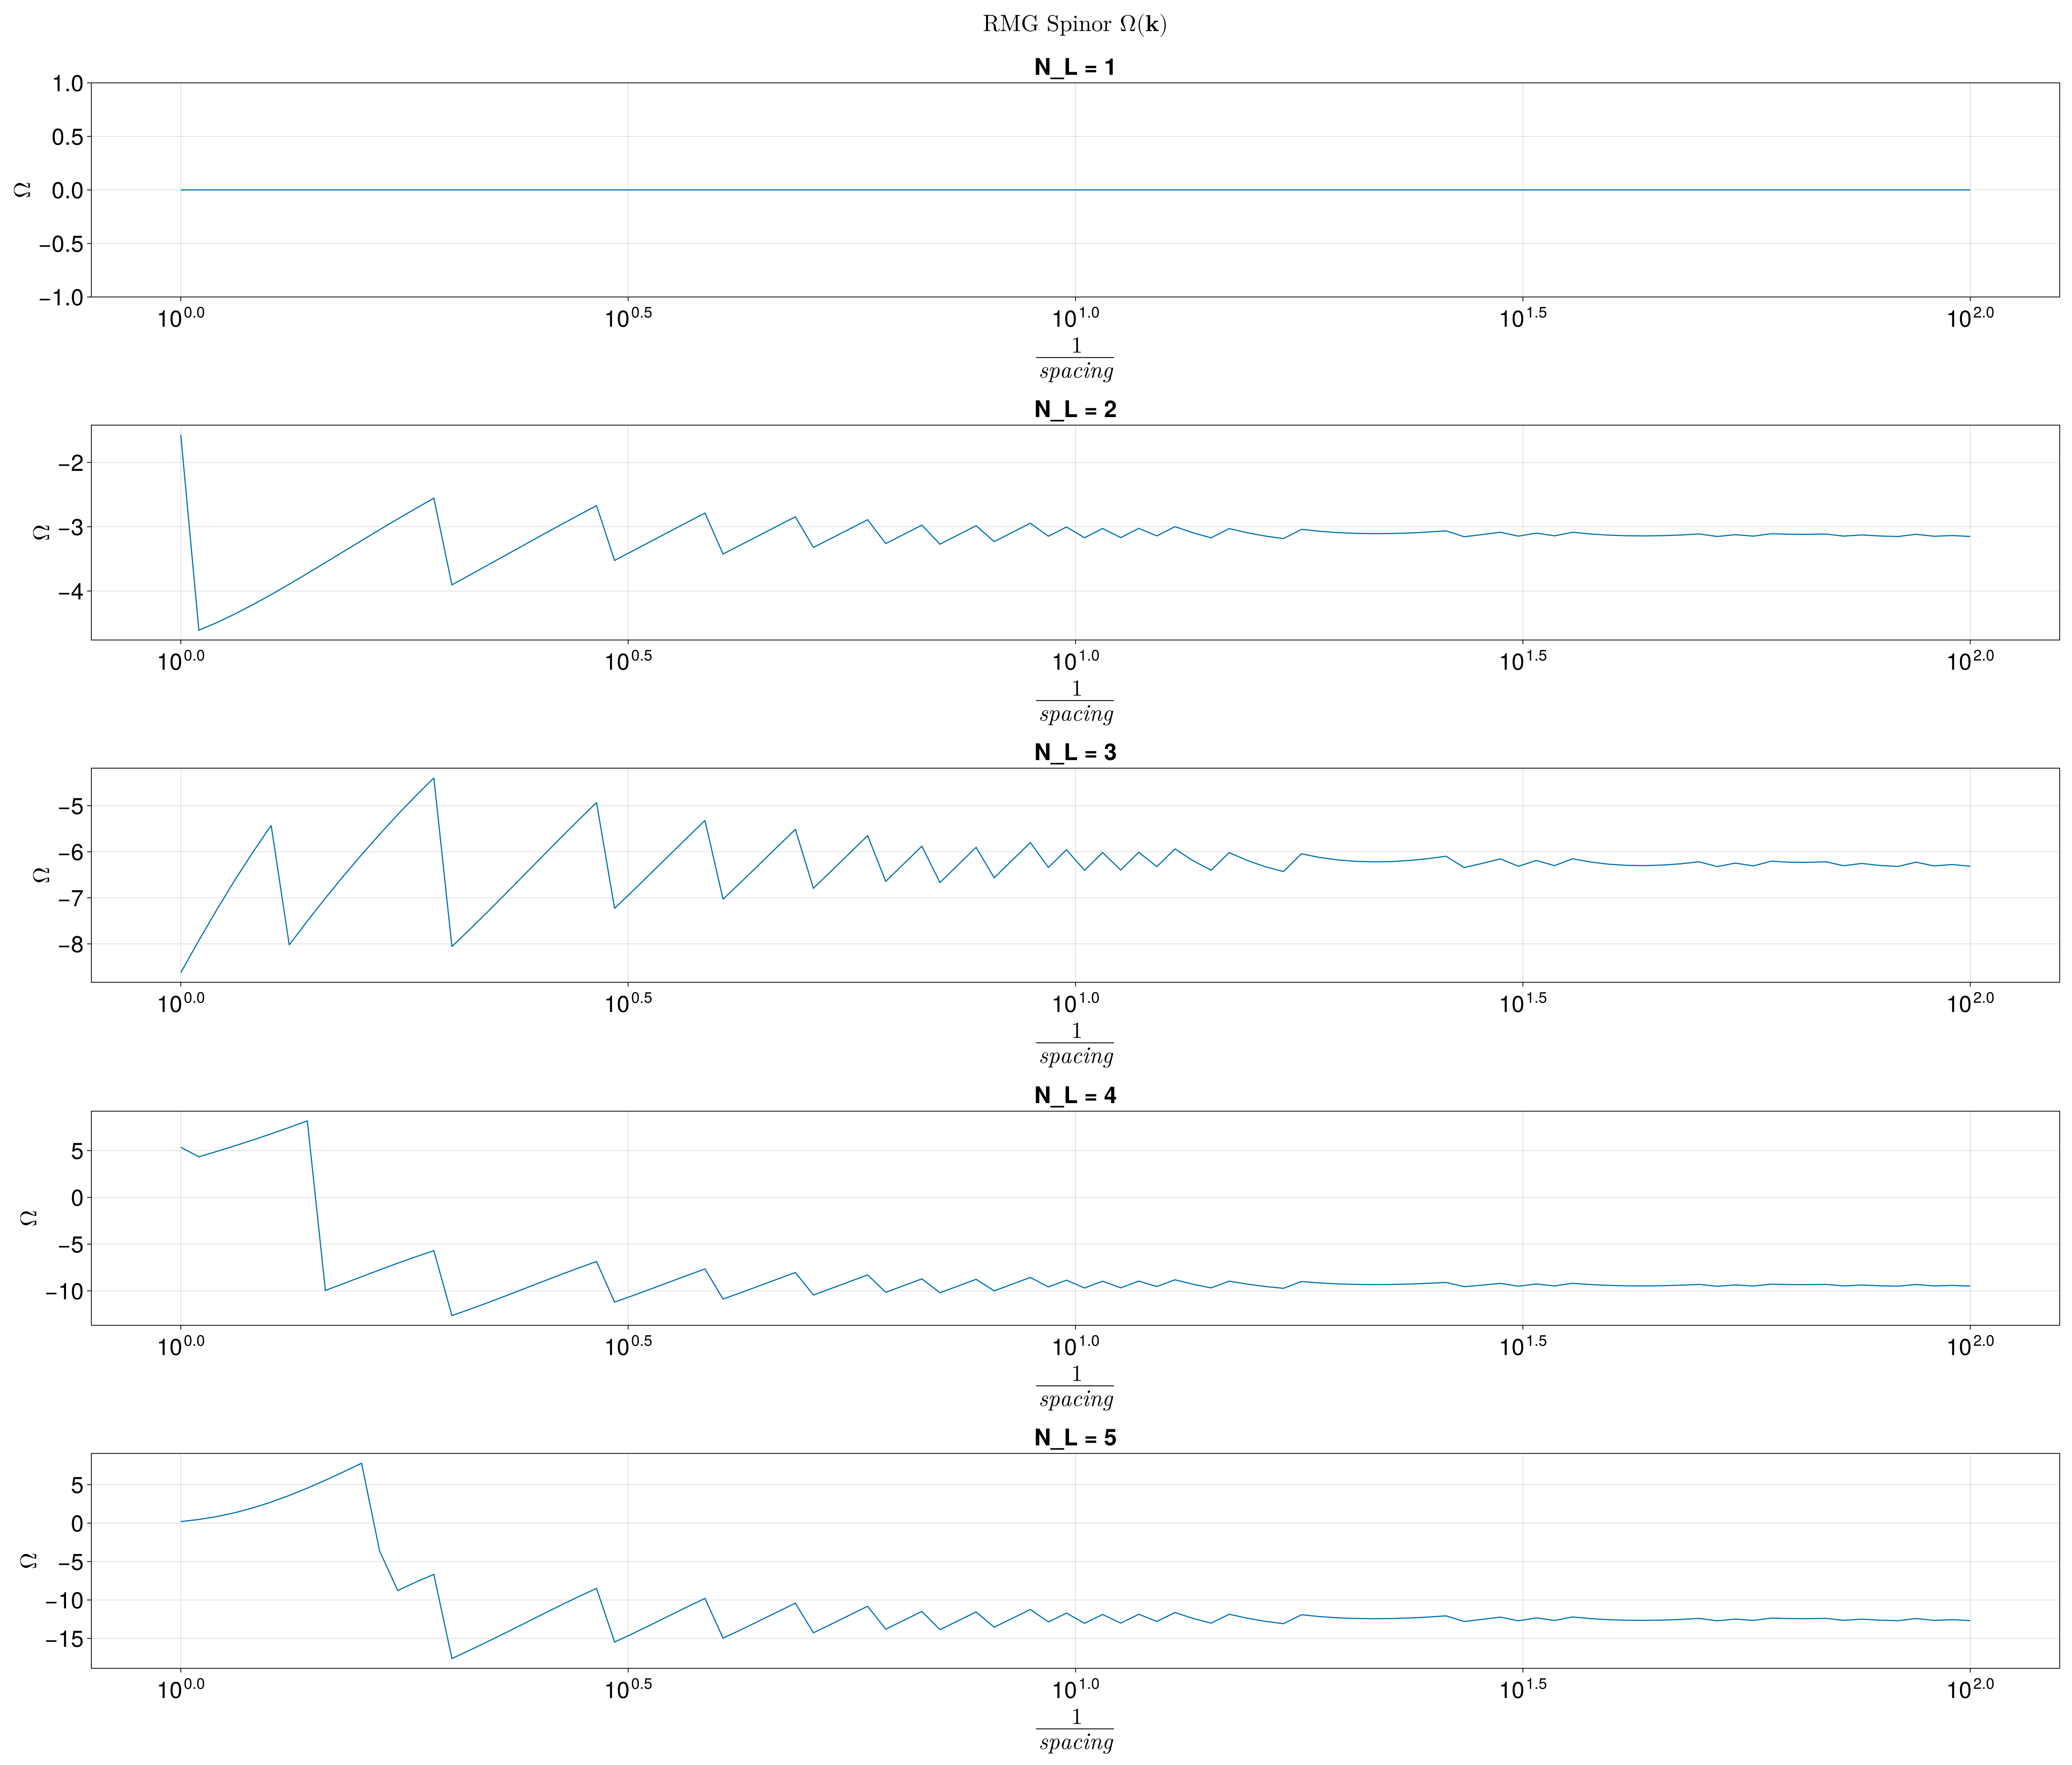

In [46]:
rmg_bc_spacing(collect(1:NL), nu, mbz_kappa, pd)

In [20]:
function rmg_int_bc_kappa(nu, Nl_lim, pd)
    kappa_pts = 10^2
    kappa_list = range(10^(-10), 20, kappa_pts)
    Nl_list = collect(1:Nl_lim)
    curvatures = Array{Float64}(undef, Nl_lim, kappa_pts)
    
    P = Figure(size=(2700, 2300), fontsize=30)
    for j in 1:Nl_lim
        Nl = Nl_list[j]
        for i in 1:kappa_pts
            m_kappa = kappa_list[i]
            spacing = 10^(-2) * m_kappa
            # grid = make_hex([10^(-16), 10^(-16)], m_kappa, m_kappa / pd)
            grid = make_circle(m_kappa, spacing)
            curvatures[j, i] = 1/2 * area(spacing, 4) * sum(rmg_spinor_bc(grid, spacing, Nl, nu))
        end
        ax1 = Axis(P[j, 1], title = "N_L = " * string(Nl), xlabel = L"\kappa", ylabel = L"\int_{D_\kappa} \Omega")
        lines!(ax1, kappa_list, curvatures[j, :])
    end
    axs1 = Axis(P[:, 1], title = L"\int_{D_\kappa} \Omega_{\text{RMG}}", titlegap = 60)
    hidedecorations!(axs1, label = false)
    hidespines!(axs1)
    P
end

rmg_int_bc_kappa (generic function with 1 method)

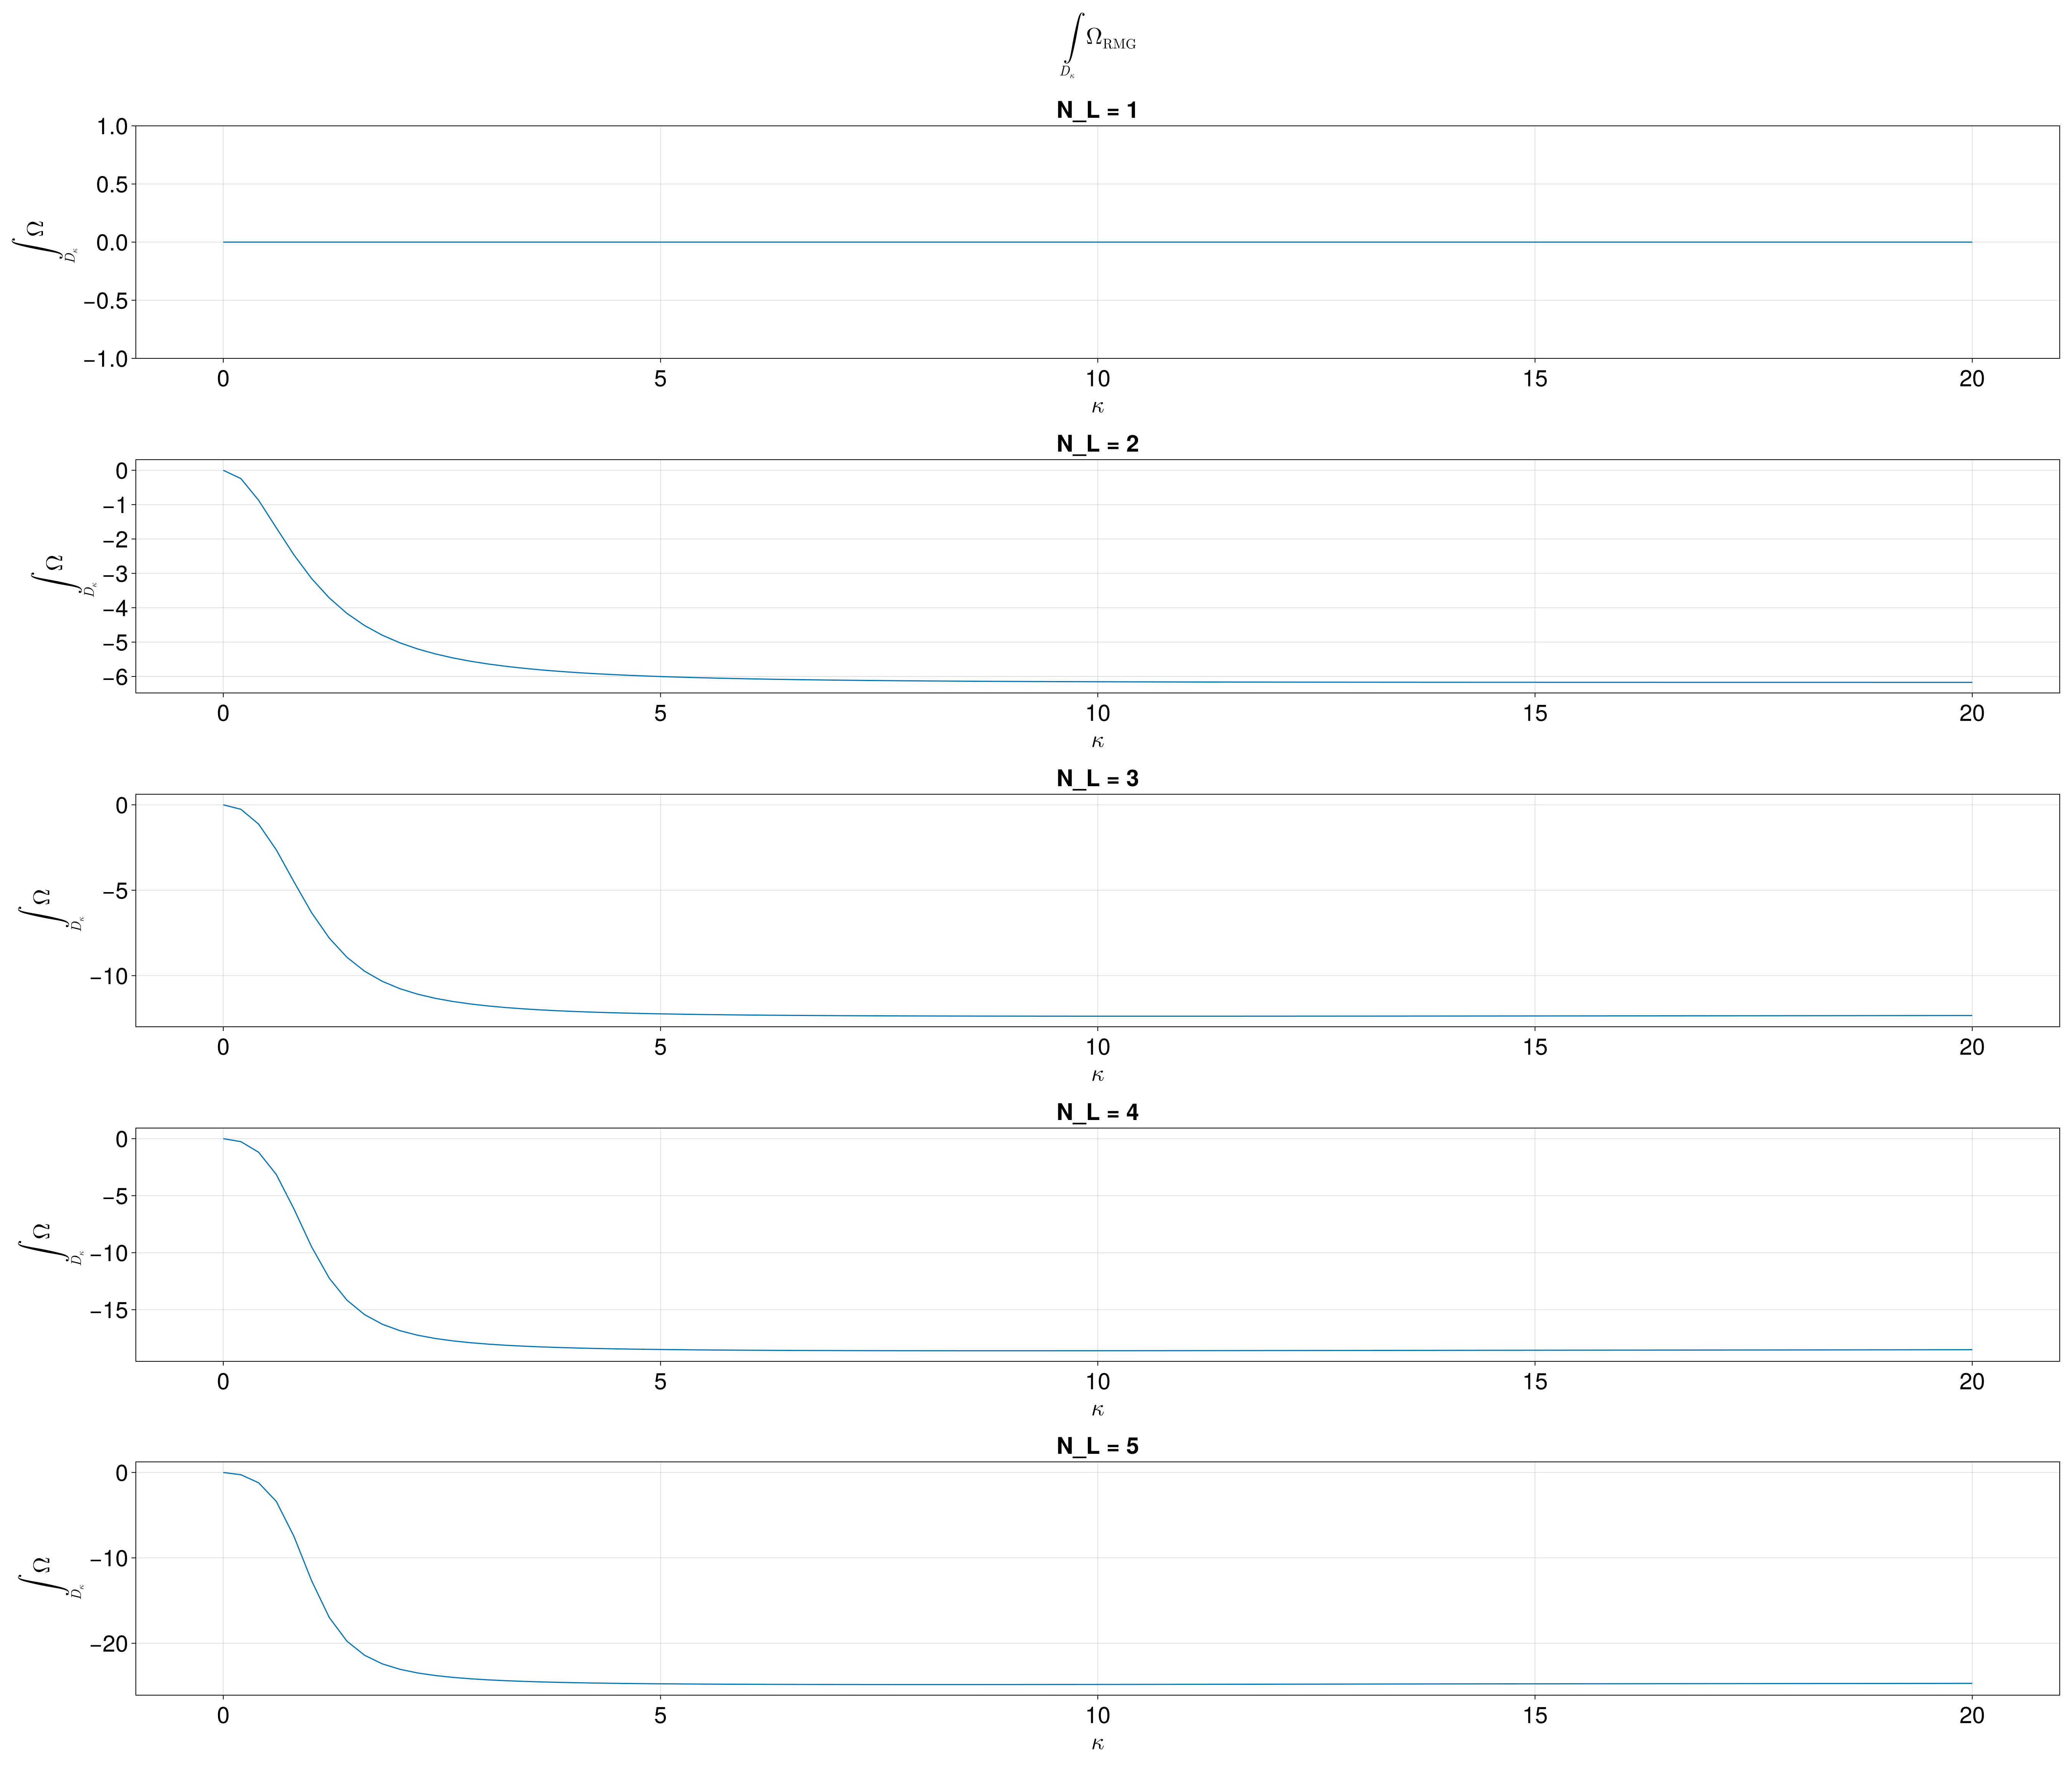

In [21]:
rmg_int_bc_kappa(nu, NL, pd)

In [28]:
# N_L layer potential
function rmg_nu_kappa_contour(NL)
    nu_pts = 10^2
    kappa_pts = 10^2
    nu_list = range(0, 10^2, nu_pts)
    kappa_list = range(0, 10^2, kappa_pts)
    grid = mesh_grid(nu_list, kappa_list, Float64)
    curves = Array{ComplexF64}(undef, nu_pts * kappa_pts)
    for j in 1:nu_pts * kappa_pts
        nu = grid[j, 1]
        m_kappa = grid[j, 2]
        spacing = 10^(-2) * m_kappa
        pts = make_circle(m_kappa, spacing)
        curvatures[j, i] = 1/2 * area(spacing, 4) * sum(rmg_spinor_bc(pts, spacing, NL, nu))
    end

    fig = Figure(size=(2600, 1500), fontsize=50, fonts = (; regular = "italic", weird = "bold"))

    ax1 = Axis(fig[1, 1], title = L" (\nu, \kappa) \ \mathrm{vs} \ \int_{D_\kappa} \Omega", xlabel = L"\nu", ylabel = L"\kappa")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], curves, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], curves, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)

    ax2 = Axis(fig[1, 3], title = L"(\nu, N_L) \ \mathrm{vs} \ \int_{D_\kappa} \Omega", xlabel = L"\nu", ylabel = L"\kappa")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], curves, colormap = :Spectral)
    X, ax2, tr2 = tricontourf(grid[:, 1], grid[:, 2], curves, colormap = :Spectral)
    cb2 = Colorbar(fig[1, 4], tr2)
    
    fig
end


rmg_nu_kappa_contour (generic function with 1 method)

In [29]:
rmg_nu_kappa_contour(NL)

InexactError: InexactError: trunc(Int64, NaN)